In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFT
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("A:\\Practicum\\Project_BaseML\\users_behavior.csv")

In [6]:
df_train, df_valid = train_test_split(df, test_size=0.2, random_state=46812)
df_train, df_test = train_test_split(df_train, test_size=0.25, random_state=46812)

In [7]:
df_train_features = df_train.drop(["is_ultra"], axis= 1)
df_train_answers = df_train["is_ultra"]
df_valid_features = df_valid.drop(["is_ultra"], axis= 1)
df_valid_answers = df_valid["is_ultra"]
df_test_features = df_test.drop(["is_ultra"], axis= 1)
df_test_answers = df_test["is_ultra"]

In [8]:
parametrs = { 'max_depth': range (1,20, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
model_tree = GridSearchCV(DTC(random_state=46812), parametrs)
model_tree.fit(df_train_features, df_train_answers)
model_tree.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [9]:
accuracy_score(df_valid_answers,model_tree.predict(df_valid_features))

0.7947122861586314

In [10]:
parametrs = { 'max_depth': range (1,21, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2),
              'n_estimators' : range(1,11)}
model_forest = GridSearchCV(RFT(random_state=46812), parametrs)
model_forest.fit(df_train_features, df_train_answers)
model_forest.best_params_

{'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 5}

In [ ]:
accuracy_score(df_valid_answers,model_forest.predict(df_valid_features))

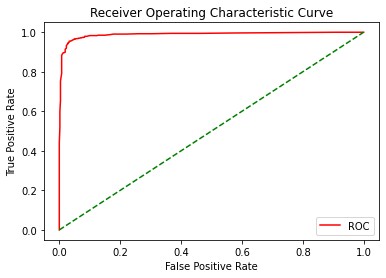

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
data_X, cls_lab = make_classification(n_samples=2100, n_classes=2, weights=[1,1], random_state=2)
train_X, test_X, train_y, test_y = train_test_split(data_X, cls_lab, test_size=0.5, random_state=2)

model =RandomForestClassifier()
model.fit(train_X, train_y)

prob = model.predict_proba(test_X)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(test_y, prob)
plot_roc_curve(fper, tper)